# Circu-linear Correlations

Correlations between a linear and cyclical variable

In [20]:
import numpy as np
from matplotlib import pyplot as pl
import seaborn as sn
sn.set_style('ticks')
%matplotlib inline
from statsmodels.stats.weightstats import DescrStatsW


Let's first take a look an example with data that has a single peak along the 0-np.pi*2 range.

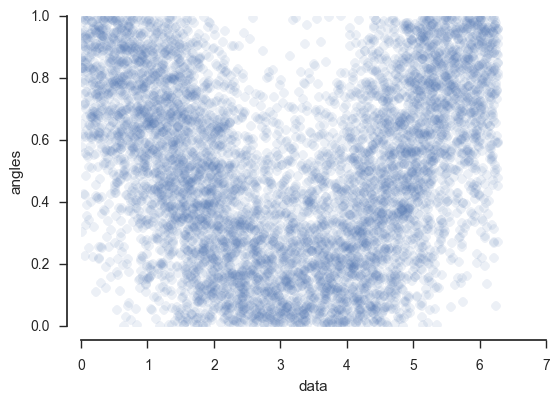

In [73]:
# get uniformly spaced angles:
angles = np.random.uniform(0,np.pi*2,int(1e4))
# now get data that is correlated with these angles:
data = np.cos(angles)
# scale data from 0-1:
data += np.abs(np.min(data))
data /= np.max(data)
# now add noise
data += np.random.randn(int(1e4))/3
# but cutoff values larger than 1 and smaller than 0
valid_values = ((data>0)*(data<1))
data = data[valid_values]
angles = angles[valid_values]

# data = data[(data>0)*(data<1)]

pl.plot(angles,data,'o',alpha=0.1)
pl.ylabel('angles')
# pl.xlim(-np.pi,np.pi)
pl.xlabel('data')
sn.despine(offset=10)

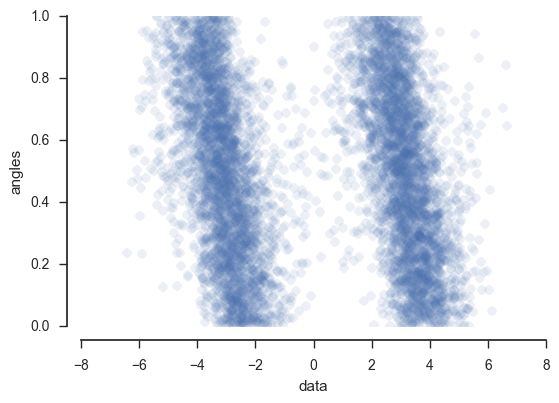

In [65]:
# get uniformly spaced angles:
right_angles = np.random.randn(int(1e4)/2)+np.pi
left_angles = np.random.randn(int(1e4)/2)-np.pi
angles = np.hstack([left_angles,right_angles])

# now get data that is correlated with these angles:
data = np.sin(angles)
# scale data from 0-1:
data += np.abs(np.min(data))
data /= np.max(data)
# now add noise
data += np.random.randn(int(1e4))/3
# but cutoff values larger than 1 and smaller than 0
valid_values = ((data>0)*(data<1))
data = data[valid_values]
angles = angles[valid_values]

# data = data[(data>0)*(data<1)]

pl.plot(angles,data,'o',alpha=0.1)
pl.ylabel('angles')
# pl.xlim(-np.pi,np.pi)
pl.xlabel('data')
sn.despine(offset=10)

In [59]:
# let's fit a spline to this

In [60]:
def circulinear_corr(angles,data):
    rxs = DescrStatsW(data=np.vstack([data,np.sin(angles)]).T).corrcoef[0,1]
    rxc = DescrStatsW(data=np.vstack([data,np.cos(angles)]).T).corrcoef[0,1]
    rcs = DescrStatsW(data=np.vstack([np.sin(angles),np.cos(angles)]).T).corrcoef[0,1]

    #compute angular-linear correlation (equ. 27.47)
    corr = np.sqrt((rxc ** 2 + rxs ** 2 - 2 * rxc * rxs * rcs) / (1 - rcs ** 2))
    
    return corr

In [61]:
corr = circulinear_corr(angles,data)
print corr

0.581040437646


when the data contain multiple peaks, we need 